In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%pylab inline
rc('text', usetex=True)        #for tex rendering. 
rc('font', family='serif')     #for pretty font 

Populating the interactive namespace from numpy and matplotlib


In [4]:
Hbar = pickle.load(open("../../example.p"))  #data
M = len(Hbar[0])
T = 18
t = np.linspace(0,T,M);
lr = np.linspace(.25,2.0,8) #length ratios for labeling
print lr

[ 0.25  0.5   0.75  1.    1.25  1.5   1.75  2.  ]


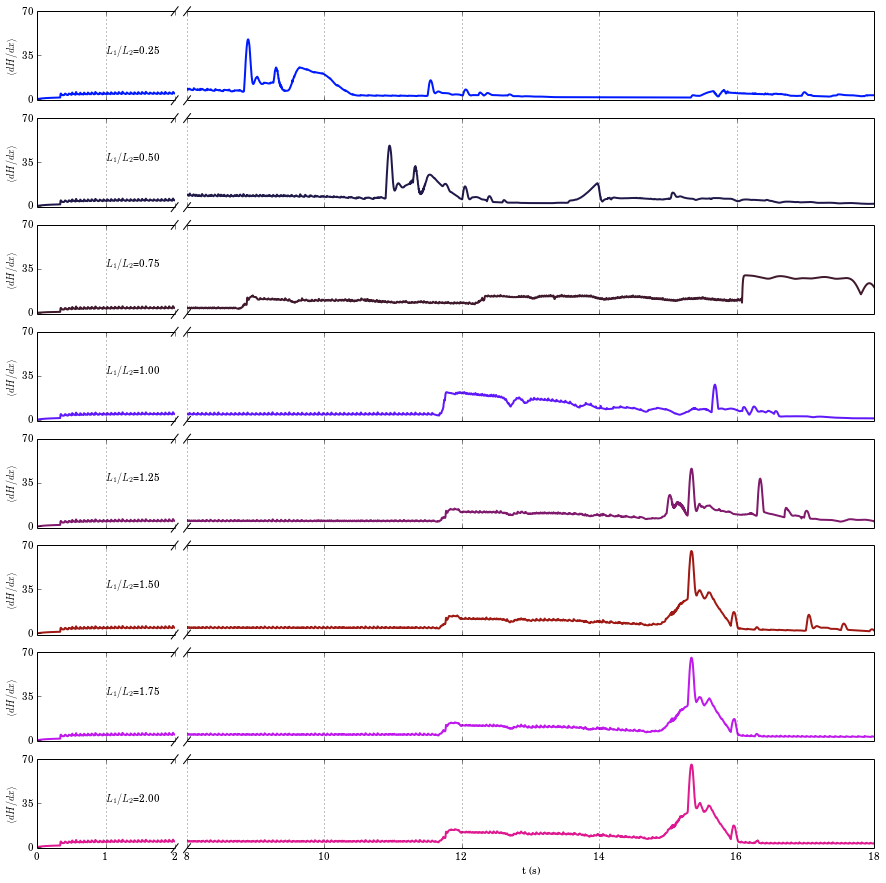

In [6]:
xlim  = [0., 2.0]
xlab = [0,1,2]
xlim2 = [8, T]
xlab2 = [8,10,12,14,16,18]
ylim = [-1,70]
yticks = [0,35,70]
xticks = [0,2]
xlimratio = (xlim[1]-xlim[0])/(xlim2[1]-xlim2[0]+xlim[1]-xlim[0])
xlim2ratio = (xlim2[1]-xlim2[0])/(xlim2[1]-xlim2[0]+xlim[1]-xlim[0])
gs = gridspec.GridSpec(len(Hbar), 2, width_ratios=[xlimratio, xlim2ratio])
fig = plt.figure(figsize=(15,15))
ax = []

for i in range(len(Hbar)):
    ax.append(fig.add_subplot(gs[2*i]))
    ax.append(fig.add_subplot(gs[2*i+1]))
    #erase the bits of bounding box you don't want
    ax[2*i].spines['right'].set_visible(False)
    ax[2*i+1].spines['left'].set_visible(False)

    ax[2*i].yaxis.tick_left()
    ax[2*i+1].set_yticks([])
    cc = (i/8., .1, np.cos(i)**2)  # color cycle
    ax[2*i].plot(t,Hbar[i],c =cc,linewidth=2)
    ax[2*i+1].plot(t,Hbar[i],c =cc,linewidth=2)

    ax[2*i+1].set_xlim(xlim2)
    ax[2*i].set_xlim(xlim)
    ax[2*i].set_ylabel(r'$\langle dH/dx \rangle$')  
    ax[2*i].set_xticklabels([])
    ax[2*i+1].set_xticklabels([])
    
    ax[2*i].set_ylim(ylim)
    ax[2*i+1].set_ylim(ylim)

    ax[2*i].set_yticks(yticks)
    ax[2*i].set_yticklabels(yticks)
    ax[2*i].set_xticks(xticks)

    ax[2*i].set_xticks([0,1,2])
    ax[2*i].text(1,ylim[1]/2,r"$L_1/L_2$=%1.2f"%lr[i])  #label the subplots
    
    #diagonal lines for split axes...so much work...
    d = .05 # how big to make the diagonal lines in axes coordinates
    kwargs = dict(transform=ax[2*i].transAxes, color='k', clip_on=False)
    dx = d/(xlim[1]-xlim[0])
    dy = d
    ax[2*i].plot((1-dx,1+dx),(-dy,+dy), **kwargs)     # top-right diagonal
    ax[2*i].plot((1-dx,1+dx),(1-dy,1+dy), **kwargs)   # bottom-right diagonal
    dx = d/(xlim2[1]-xlim2[0])
    kwargs.update(transform=ax[2*i+1].transAxes)      # switch to the bottom axes
    ax[2*i+1].plot((-dx,+dx),(-dy,+dy), **kwargs)      # top-left diagonal
    ax[2*i+1].plot((-dx,+dx),(1-dy,1+dy), **kwargs)    # bottom-left diagonal
    plt.subplots_adjust(wspace=0.03)
    
    #make vertical gridlines
    ax[2*i+1].xaxis.grid(True)
    ax[2*i].xaxis.grid(True)
ax[2*i].set_xticklabels(xlab)
ax[2*i+1].set_xticklabels(xlab2)
ax[2*i+1].set_xlabel('t (s)')
plt.show()
#savefig("pretty.eps", format='eps')

In [ ]:
print 4